# Hands-on-ml 
# MNIST (Classification Example)

## 1. Data load

In [11]:
import pandas as pd, numpy as np
import seaborn as sns

In [23]:
from six.moves import urllib
from sklearn.datasets import fetch_mldata

from scipy.io import loadmat
mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
mnist_path = "./mnist-original.mat"
response = urllib.request.urlopen(mnist_alternative_url)
with open(mnist_path, "wb") as f:
    content = response.read()
    f.write(content)
mnist_raw = loadmat(mnist_path)
mnist = {
    "data": mnist_raw["data"].T,
    "target": mnist_raw["label"][0],
    "COL_NAMES": ["label", "data"],
    "DESCR": "mldata.org dataset: mnist-original",
}
print("Success!")

Success!


In [24]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [26]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [27]:
y.shape

(70000,)

There are 70,000 images and each image has 784 features.(28*28)

##### Draw just one example to explore and predict

In [39]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)

<function matplotlib.pyplot.show>

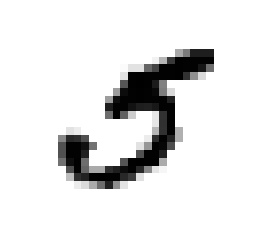

In [42]:
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off") # delete line
plt.show

In [43]:
y[36000]

5.0

This dataset is already splitted, trainset and test set.

I have to shuffled.

In [46]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

shuffle_index = np.random.permutation(60000)

In [47]:
shuffle_index

array([ 8059, 20208, 50562, ..., 36737, 45963, 16225])

In [48]:
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## 2.  Binary Classifier

### For only 5 (5 or not)

##### Binary classification is more simple example of classification

In [50]:
y_train_5 = (y_train == 5)
y_test_5  = (y_test == 5)

Using Stochastic Gradient Descent

In [58]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [59]:
sgd_clf.predict([some_digit])

array([ True])

## 3. Performance measure

### 3.1 Crossvalidation

In [75]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
stratK = StratifiedKFold(n_splits=10, random_state=42)

sgd_clf_score = cross_val_score(sgd_clf, X_train, y_train_5, cv=stratK, scoring='accuracy')

In [76]:
sgd_clf_score

array([0.96200633, 0.956     , 0.93783333, 0.93166667, 0.9625    ,
       0.96566667, 0.95616667, 0.9685    , 0.96316667, 0.96932822])

The score of all 10fold cross validation is quite high. 

#####  But It shows Measuring Performance by 'accuracy' is not good way. 
We use confusion matrix for more reasonable measure

### 3.2 Confusion Matrix

In [79]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [83]:
y_train_pred

array([False, False, False, ..., False, False, False])

###### Using cross_val_predict which give us not a score but actual prediction, 
We can compare answer and prediction by confusion matrix

In [82]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[54073,   506],
       [ 1784,  3637]], dtype=int64)

There are several term to measure performance.(Recall, Sensitivity, F1-score, Precision)

That which performance index is important depends on what problem is to solve by machine learning.

I'm not going to check and explain all performance index in this notebook.

### 3.3 Precision and Recall

In [88]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8778662804730871

In [89]:
recall_score(y_train_5, y_train_pred)

0.6709094263051097

We can use 'F1 score' harmonic mean of precision and recall

In [93]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.76056043496445